In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Data #

In [111]:
train = pd.read_csv('./train.csv', index_col='id')
test = pd.read_csv('./test.csv', index_col='id')

In [112]:
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [113]:
test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
id,,,,,,,,,,,,,,,,,,,,,
159256,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
159257,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
159258,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
159259,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
159260,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1


In [114]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

# Data Analysis #

<AxesSubplot:xlabel='dental caries', ylabel='count'>

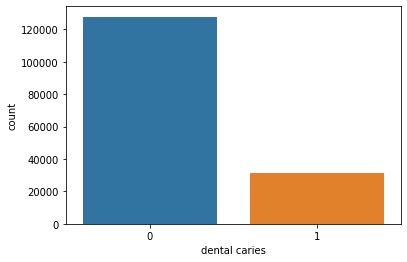

In [115]:
sns.countplot(x=train['dental caries'])

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

In [117]:
df = pd.concat([train.drop('smoking', axis=1), test], axis=0)
y = train.smoking

<AxesSubplot:xlabel='hearing(left)', ylabel='hearing(right)'>

<Figure size 3000x2000 with 0 Axes>

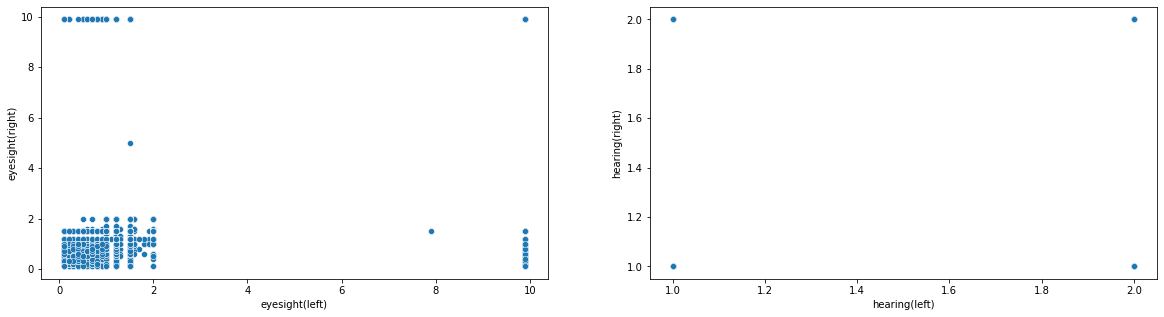

In [118]:
fig = plt.figure(dpi=500);
figure, ((ax11,ax12)) = plt.subplots(1,2, figsize=(20,5))
sns.scatterplot(ax=ax11, data=df, x='eyesight(left)', y='eyesight(right)')
sns.scatterplot(ax=ax12, data=df, x='hearing(left)', y='hearing(right)')

<AxesSubplot:xlabel='hearing(right)', ylabel='count'>

<Figure size 3000x2000 with 0 Axes>

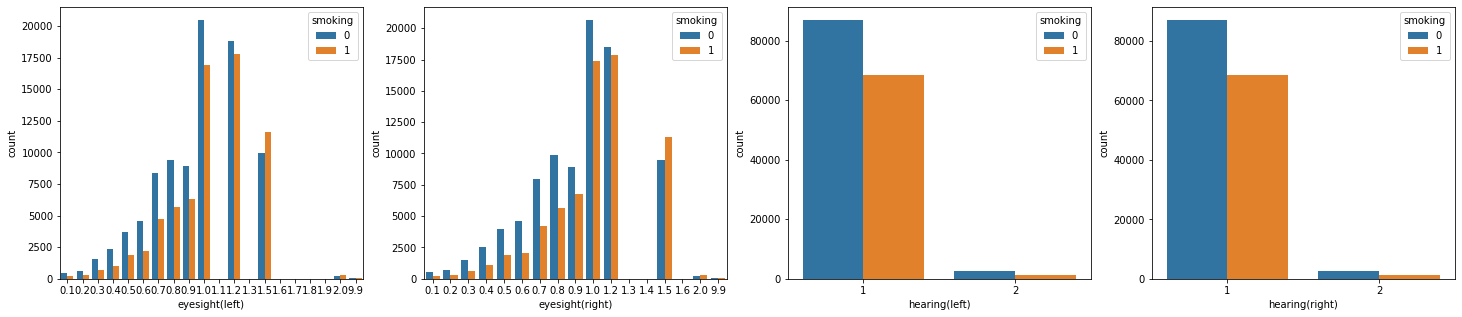

In [119]:
fig = plt.figure(dpi=500);
figure, ((ax11,ax12, ax13, ax14)) = plt.subplots(1,4, figsize=(25,5))
sns.countplot(ax=ax11, data=train, x='eyesight(left)', hue='smoking')
sns.countplot(ax=ax12, data=train, x='eyesight(right)', hue='smoking')
sns.countplot(ax=ax13, data=train, x='hearing(left)', hue='smoking')
sns.countplot(ax=ax14, data=train, x='hearing(right)', hue='smoking')

<AxesSubplot:>

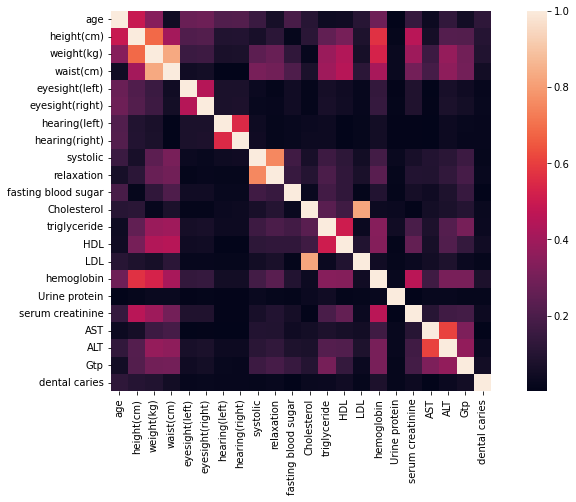

In [120]:
plt.figure(figsize=(13,7))
sns.heatmap(data=df.corr().abs(), square=True)

In [124]:

(df.corr().abs() > 0.7).sum()

age                    1
height(cm)             1
weight(kg)             2
waist(cm)              2
eyesight(left)         1
eyesight(right)        1
hearing(left)          1
hearing(right)         1
systolic               2
relaxation             2
fasting blood sugar    1
Cholesterol            2
triglyceride           1
HDL                    1
LDL                    2
hemoglobin             1
Urine protein          1
serum creatinine       1
AST                    1
ALT                    1
Gtp                    1
dental caries          1
dtype: int64

We notice that the correlation given for the features subdivided by left and right have the same order in respect to the rest of the features, thus we will feature Engineer those features

## Feature Enigneer ##  

In [125]:
eyesight = df[['eyesight(left)','eyesight(right)']].transpose().mean()
hearing = df[['hearing(left)','hearing(right)']].transpose().mean()

In [126]:
df['eyesight'] = eyesight
df['hearing'] = hearing
df = df.drop(['hearing(left)','hearing(right)'], axis=1)
df = df.drop(['eyesight(left)','eyesight(right)'], axis=1)

<AxesSubplot:xlabel='Cholesterol', ylabel='LDL'>

<Figure size 3000x2000 with 0 Axes>

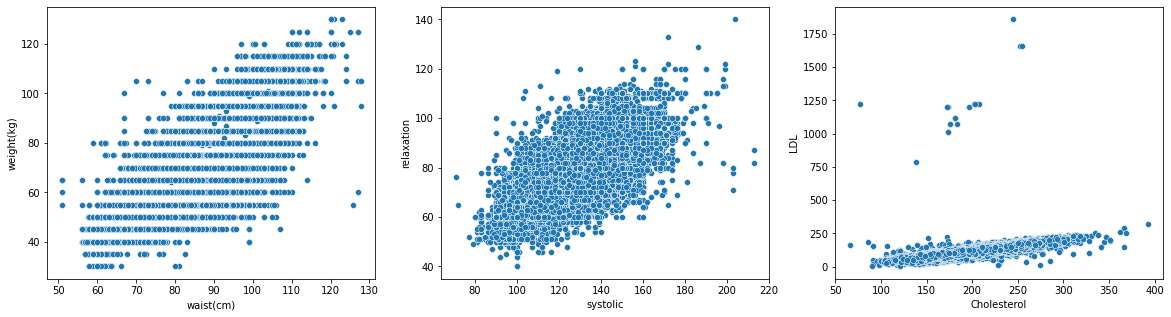

In [127]:
fig = plt.figure(dpi=500);
figure, ((ax11,ax12, ax13)) = plt.subplots(1,3, figsize=(20,5))
sns.scatterplot(ax=ax11, data=df, x='waist(cm)', y='weight(kg)')
sns.scatterplot(ax=ax12, data=df, x='systolic', y='relaxation')
sns.scatterplot(ax=ax13, data=df, x='Cholesterol', y='LDL')

In [133]:
df[['Cholesterol','LDL','waist(cm)','weight(kg)', 'systolic', 'relaxation']]

,Cholesterol,LDL,waist(cm),weight(kg),systolic,relaxation
id,,,,,,
0,172,75,81.0,60,135,87
1,194,126,89.0,65,146,83
2,178,93,81.0,75,118,75
3,180,102,105.0,95,131,88
4,155,93,80.5,60,121,76
...,...,...,...,...,...,...
265422,225,149,78.0,60,112,78
265423,180,100,95.0,85,130,90
265424,211,142,89.0,85,131,86


According with our analysis we will consider the following points: 
1) Because LDL, HDL are types of cholesterol, and "Cholesterol" its total, we will get rid off the total ammount and extract more information from its subparts.
2) Given the strong linear relationship in between weight and waist, we will consider only the more precise measurement on the mass in kilograms. The waist is more subsceptible to changes because of the flexibility of the skin.
3) Being the systolic and relaxation features blood preasure type, we will the two of them, since there are extra cases that are not as strongly correlated that might be good indicators for smoking patients.

In [137]:
df.drop(['Cholesterol', 'waist(cm)'], axis=1)

,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,eyesight,hearing
id,,,,,,,,,,,,,,,,,,
0,55,165,60,135,87,94,300,40,75,16.5,1,1.0,22,25,27,0,0.55,1.0
1,70,165,65,146,83,147,55,57,126,16.2,1,1.1,27,23,37,1,0.65,2.0
2,20,170,75,118,75,79,197,45,93,17.4,1,0.8,27,31,53,0,0.45,1.0
3,35,180,95,131,88,91,203,38,102,15.9,1,1.0,20,27,30,1,1.35,1.0
4,30,165,60,121,76,91,87,44,93,15.4,1,0.8,19,13,17,0,1.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265422,40,165,60,112,78,134,82,59,149,16.4,1,1.1,24,31,28,0,0.85,1.0
265423,40,170,85,130,90,97,186,44,100,16.0,2,1.0,25,31,38,0,1.20,1.0
265424,35,170,85,131,86,106,76,53,142,15.9,1,0.8,33,32,24,1,1.20,1.0


# Train Test Split #

In [142]:
X = df.iloc[:159256]
X_test = df.iloc[159256:]

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization #

In [236]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [237]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Report of the model #

In [238]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [239]:
def report(model, X_valid, y_valid):
    pred = (model.predict(X_valid) > 0.5).astype('int')
    print(classification_report(y_pred=pred, y_true=y_valid))
    matrix = confusion_matrix(y_true=y_valid, y_pred=pred)
    dis = ConfusionMatrixDisplay(matrix)
    dis.plot()
    plt.show()

# Model Random Forrest #

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [265]:
param_grid={'n_estimators':[100,200,150],
           'criterion':['gini', 'entropy'],
           'max_features':['log2','sqrt']}

In [266]:
grid_model = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         verbose=1)

In [267]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 200, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [268]:
grid_model.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 200}

In [271]:
rf_model = RandomForestClassifier(n_estimators=200, criterion='gini', max_features='log2')

In [272]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_features='log2', n_estimators=200)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79     17783
           1       0.72      0.80      0.76     14069

    accuracy                           0.77     31852
   macro avg       0.77      0.78      0.77     31852
weighted avg       0.78      0.77      0.77     31852



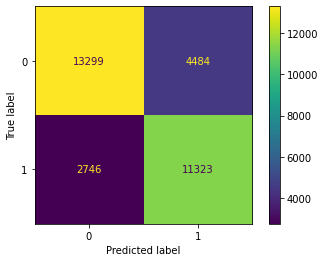

In [273]:
report(rf_model, X_valid_scaled, y_valid)

# Model XBG #

In [240]:
from xgboost import XGBClassifier

In [241]:
xbg_model = XGBClassifier(n_estimators=200, learning_rate=0.5, n_jobs=4)

In [242]:
xbg_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=4, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79     17783
           1       0.72      0.78      0.75     14069

    accuracy                           0.77     31852
   macro avg       0.77      0.77      0.77     31852
weighted avg       0.77      0.77      0.77     31852



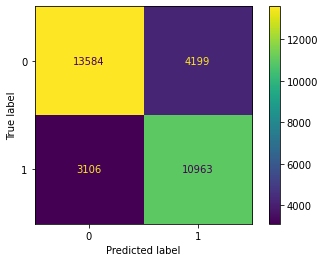

In [243]:
report(xbg_model, X_valid_scaled, y_valid)

# Model NN #

In [244]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [245]:
model = Sequential()

model.add(Dense(18, activation='relu',kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))
model.add(BatchNormalization(synchronized=True))
model.add(Dropout(0.2))
model.add(Dense(18, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [246]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=0)

In [247]:
model.fit(X_train_scaled, y_train,
          epochs=20,
          validation_data=[X_valid_scaled, y_valid],
          batch_size=50,
          callbacks=early_stop,
          verbose=1)

Epoch 1/20


2549/2549 [==============================] - 6s 2ms/step - loss: 0.5975 - accuracy: 0.7479 - val_loss: 0.5032 - val_accuracy: 0.7621
Epoch 2/20
2549/2549 [==============================] - 5s 2ms/step - loss: 0.5014 - accuracy: 0.7574 - val_loss: 0.4933 - val_accuracy: 0.7622
Epoch 3/20
2549/2549 [==============================] - 4s 2ms/step - loss: 0.4993 - accuracy: 0.7591 - val_loss: 0.4991 - val_accuracy: 0.7615
Epoch 4/20
2549/2549 [==============================] - 5s 2ms/step - loss: 0.4979 - accuracy: 0.7596 - val_loss: 0.4960 - val_accuracy: 0.7588
Epoch 5/20
2549/2549 [==============================] - 4s 2ms/step - loss: 0.4966 - accuracy: 0.7609 - val_loss: 0.4931 - val_accuracy: 0.7620
Epoch 6/20
2549/2549 [==============================] - 4s 2ms/step - loss: 0.4973 - accuracy: 0.7599 - val_loss: 0.5045 - val_accuracy: 0.7557
Epoch 7/20
2549/2549 [==============================] - 4s 2ms/step - loss: 0.4971 - accuracy: 0.7586 - val_loss: 0.4939 - val_accuracy: 0.7604
Epo

In [248]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 18)                378       
                                                                 
 batch_normalization_4 (Bat  (None, 18)                72        
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 18)                0         
                                                                 
 dense_17 (Dense)            (None, 18)                342       
                                                                 
 dense_18 (Dense)            (None, 6)                 114       
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                      

<AxesSubplot:>

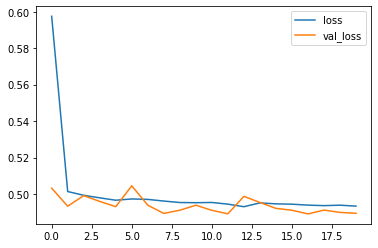

In [249]:
pd.DataFrame(data=model.history.history)[['loss','val_loss']].plot()

996/996 [==============================] - 1s 735us/step
              precision    recall  f1-score   support

           0       0.83      0.72      0.77     17783
           1       0.70      0.82      0.75     14069

    accuracy                           0.76     31852
   macro avg       0.77      0.77      0.76     31852
weighted avg       0.77      0.76      0.76     31852



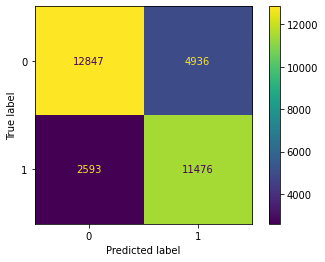

In [250]:
report(model, X_valid_scaled, y_valid)

In [274]:
predictions = (model.predict(X_test_scaled) > 0.5).astype('int')
submission = pd.DataFrame(index=test.index, data= predictions, columns=['smoking'])

3318/3318 [==============================] - 5s 1ms/step


In [275]:
submission.to_csv('submission.csv')